In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('https://github.com/wesleyesantos/Datathon/raw/main/df_aluno.csv')

In [ ]:
# 2. Definir variáveis de entrada (X) e variável de saída (y)
X = df[['IEG','IAN', 'IAA', 'IPS','IDA','IPP', 'IPV']]  # Variáveis preditoras
y = df['INDE']  # Variável de saída (nota)

In [ ]:
# 3. Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Normalizar os dados (recomendado para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Criar o modelo de rede neural (MLP)
model = Sequential()
# Camada de entrada e primeira camada oculta
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
# Segunda camada oculta
model.add(Dense(units=32, activation='relu'))
# Camada de saída para prever a nota
model.add(Dense(units=1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 7. Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.5191
Epoch 2/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8263
Epoch 3/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7432
Epoch 4/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3837
Epoch 5/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2132
Epoch 6/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1527
Epoch 7/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0845
Epoch 8/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0527
Epoch 9/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0369
Epoch 10/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0273
Epoch 11/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206
Epoch 12/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0169
Epoch 13/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114
Epoch 14/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 15/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# 8. Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error no conjunto de teste: {mse}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error no conjunto de teste: 0.001300889652364255


In [ ]:
# 9. Fazer previsões
novos_dados = df[['IEG','IAN', 'IAA', 'IPS','IDA','IPP', 'IPV']]  # Exemplo de novos dados (aluno em 2023)
novos_dados_scaled = scaler.transform(novos_dados)
predicao = model.predict(novos_dados_scaled)
print(f'Previsão de nota: {predicao[0][0]:.2f}')

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Previsão de nota: 7.88


# Gráfico de Dispersão (Scatter Plot) - Previsões vs. Valores Reais

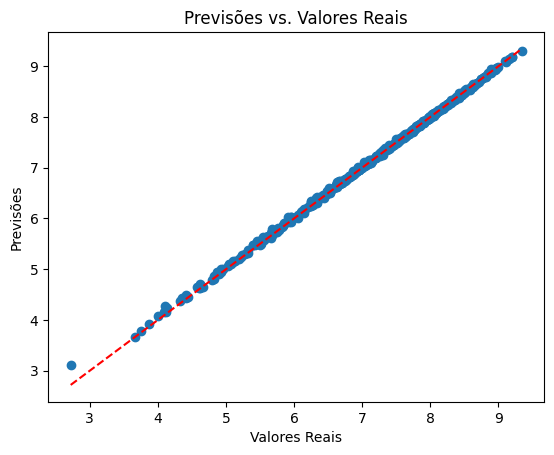

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()

# Histograma dos Erros (Resíduos)

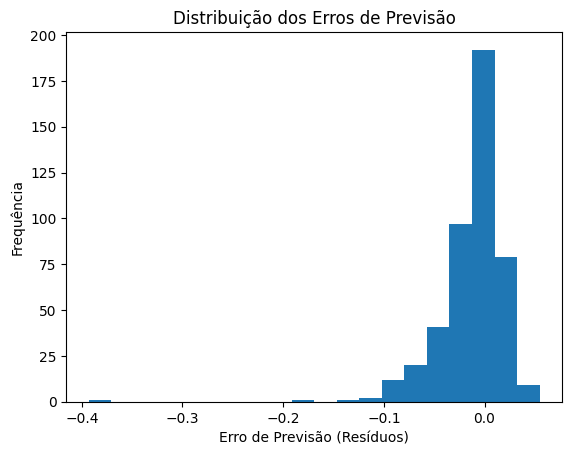

In [ ]:
# Garantir que y_test e y_pred sejam arrays 1D
y_test = np.array(y_test).flatten()  # Transforma y_test em 1D, caso necessário
y_pred = np.array(y_pred).flatten()  # Transforma y_pred em 1D, caso seja 2D

# Agora calculamos os resíduos (diferença entre valores reais e previstos)
residuals = y_test - y_pred

# Plotar o histograma dos resíduos
plt.hist(residuals, bins=20)
plt.xlabel('Erro de Previsão (Resíduos)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Erros de Previsão')
plt.show()

# Gráfico de Resíduos (Residuals Plot)


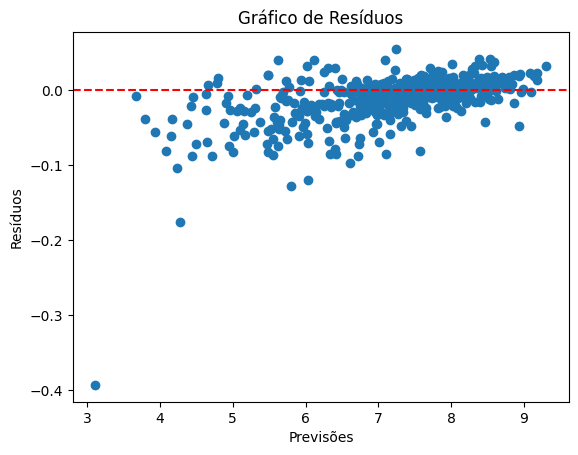

In [ ]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

# Curva de Aprendizado (Learning Curve)

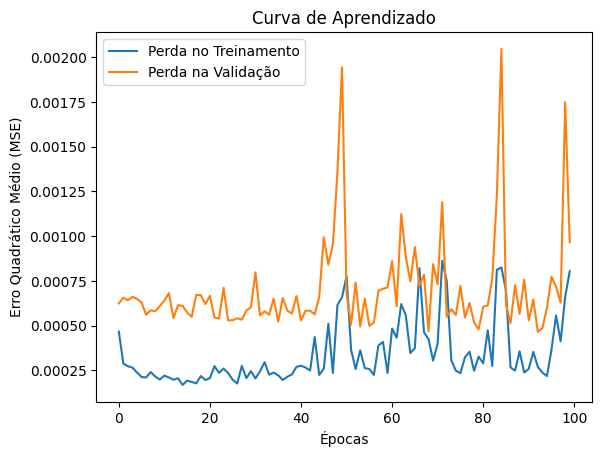

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, verbose=0)

plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()


# Boxplot dos Erros de Previsão

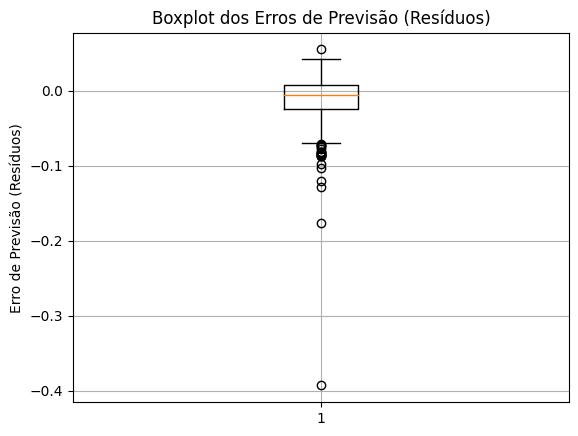

In [ ]:
plt.boxplot(residuals)
plt.title('Boxplot dos Erros de Previsão (Resíduos)')
plt.ylabel('Erro de Previsão (Resíduos)')
plt.grid(True)
plt.show()

# Matriz de Correlação (Correlation Heatmap)

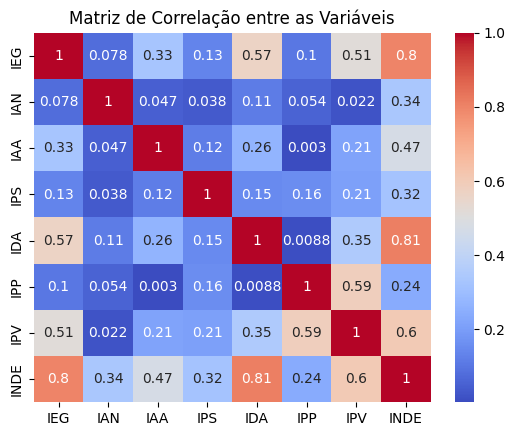

In [ ]:
corr = df[['IEG','IAN', 'IAA', 'IPS','IDA','IPP', 'IPV', 'INDE']]

corr_matrix = corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

# Gráfico de Importância de Características (Feature Importance Plot)

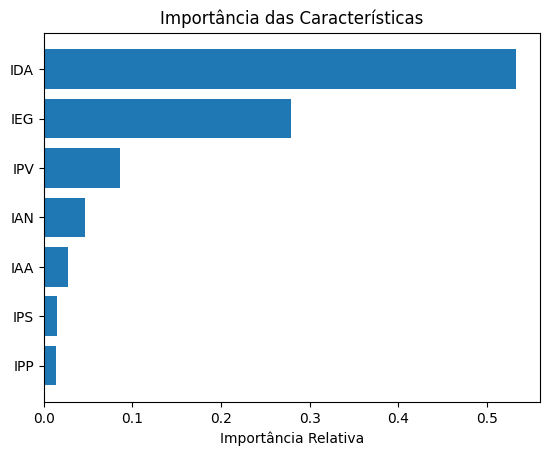

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Importância das Características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importância Relativa')
plt.show()